# Datos Brutos

In [1]:
import os
import pandas as pd 
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_dir=os.path.join('.','datos')

In [3]:
def cargarserie(dato,base=base_dir):
    serie_path=os.path.join(base_dir,'datos_00'+str(dato)+'.lvm')
    serie_datos=pd.read_csv(serie_path,sep='\t',skiprows=21,decimal=',')
    serie_datos=serie_datos.rename(index=str,columns={'X_Value':'Tiempo [s]'})
    serie_datos=serie_datos.loc[serie_datos['Tiempo [s]']<=30].copy()
    return serie_datos

In [31]:
dato=1
d1=cargarserie(dato)
promedio=d1.mean(axis=0)
desv=d1.std(axis=0)
presion_exp=promedio.to_frame()
desvi=desv.to_frame()
presion_exp.loc[:,str(1)]=promedio.values
desvi.loc[:,str(1)]=desv.values
for arch in range(2,10):
    d=cargarserie(arch)
    promedio=d.mean(axis=0)
    desv=d.std(axis=0)
    
    presion_exp.loc[:,str(arch)]=promedio.values
    desvi.loc[:,str(arch)]=desv.values
    

presion_exp=presion_exp.drop(0,1)
presion_exp=presion_exp.drop(presion_exp.index[0],0)
presion_exp=presion_exp.drop(presion_exp.index[-1],0)
presion_exp=presion_exp.rename({'A3':1,'A4':13,'A0':14,'A2':2,'A5':3,'A1':4,
              'A14':8,'A10':12,'A9':6,'A13':7,'A12':11,
              'A8':10,'A11':9})
presion_exp.sort_index(inplace=True)
presion_exp.rename(columns={'1':'0 rpm','2':'200 rpm','3':'300 rpm','4':'400 rpm','5':'500 rpm','6':'700 rpm','7':'800 rpm','8':'850 rpm','9':'900 rpm'}, inplace=True)


desvi=desvi.drop(0,1)
desvi=desvi.drop(desvi.index[0],0)
desvi=desvi.drop(desvi.index[-1],0)
desvi=desvi.rename({'A3':1,'A4':13,'A0':14,'A2':2,'A5':3,'A1':4,
              'A14':8,'A10':12,'A9':6,'A13':7,'A12':11,
              'A8':10,'A11':9})
desvi.sort_index(inplace=True)
desvi.rename(columns={'1':'0 rpm','2':'200 rpm','3':'300 rpm','4':'400 rpm','5':'500 rpm','6':'700 rpm','7':'800 rpm','8':'850 rpm','9':'900 rpm'}, inplace=True)


cor=[0,65.46,227.61,317.61,608.69,797.79,823.66,897.04,907.83,790.02,637.80,267.02,95.46]
Ycor=pd.Series(cor,presion_exp.index)
presion_exp['y_coordinate']=Ycor


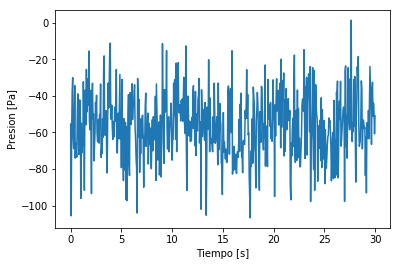

Tiempo [s]     8.681902
A0            12.240494
A1             9.553523
A2             4.941921
A3            12.118370
A4            10.146252
A5            10.282828
A9             4.166407
A10           17.500165
A11            7.770423
A12           35.466016
A13            6.933331
A14            7.845811
A8             8.649776
Comment             NaN
dtype: float64

In [27]:
plt.plot(d['Tiempo [s]'],d['A10'])
plt.xlabel('Tiempo [s]')
plt.ylabel('Presion [Pa]')
plt.savefig('PresiónenelTiempo(punto2).jpg')
plt.show()

d.std(axis=0)

In [6]:
Cp_exp=presion_exp.iloc[:,:-1].div(presion_exp.iloc[0,:-1])
Cp_exp

,0 rpm,200 rpm,300 rpm,400 rpm,500 rpm,700 rpm,800 rpm,850 rpm,900 rpm
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.545560,0.046114,-0.012007,-0.019588,-0.038348,-0.116983,-0.111835,-0.069250,-0.066815
3,0.883200,0.524004,0.459315,0.452026,0.441820,0.393254,0.391441,0.413799,0.415105
4,0.602718,0.399348,0.395134,0.399029,0.393500,0.347683,0.348817,0.370900,0.373630
6,0.831789,0.020937,-0.086370,-0.101908,-0.129236,-0.219625,-0.212421,-0.167111,-0.163140
7,0.535268,-0.052381,-0.139562,-0.149718,-0.173158,-0.269760,-0.257867,-0.210740,-0.201920
8,0.386661,0.058883,0.018363,0.011437,-0.007995,-0.088695,-0.085380,-0.043724,-0.040318
9,0.785667,0.095935,0.010128,-0.000964,-0.019008,-0.103818,-0.101683,-0.060159,-0.057756
10,0.718065,0.063042,-0.022442,-0.033142,-0.048102,-0.135207,-0.136827,-0.094003,-0.092582
11,0.513230,0.234133,0.196284,0.175892,0.175568,0.055859,0.053745,0.067292,0.088776


# Simulacion

In [7]:
import matplotlib.pyplot as plt

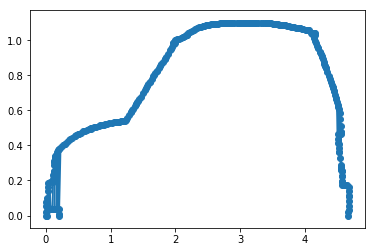

In [8]:
sup_path=os.path.join(base_dir,'Simetria_superior.csv')
sup_datos=pd.read_csv(sup_path,sep=',',decimal='.')
sup_datos.loc[:,'y_coordinate']=-sup_datos.loc[:,'y_coordinate']-min(-sup_datos.loc[:,'y_coordinate'])
sup_datos.loc[:,'z_coordinate']=sup_datos.loc[:,'z_coordinate']-min(sup_datos.loc[:,'z_coordinate'])
sup_datos=sup_datos.sort_values('y_coordinate')
sup_datos.reset_index(drop= True,inplace= True)

plt.scatter(sup_datos.loc[:,'y_coordinate'],sup_datos.loc[:,'z_coordinate'])

plt.plot(sup_datos.loc[:,'y_coordinate'],sup_datos.loc[:,'z_coordinate'])




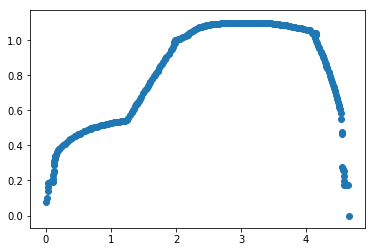

In [9]:
y=sup_datos.loc[sup_datos['y_coordinate']<0.4,'y_coordinate'].values
z=sup_datos.loc[sup_datos['y_coordinate']<0.4,'z_coordinate'].values

n=[]
ult=0
for i in range(1,size(z)):
    if z[ult] >z[i]:
        n.append(i)
    else:
        ult=i
sup_datos.drop(n,axis= 0, inplace= True)




n2=[]
ind=sup_datos.loc[(sup_datos['y_coordinate']>4.4) ,'z_coordinate'].index
ult=ind[0]
finish=False
for i in ind:
    if sup_datos.loc[i,'z_coordinate']< 0.1 and not finish:
        finish= True
        continue
        print(here)
    rango=(sup_datos.loc[i,'y_coordinate']<4.552 or sup_datos.loc[i,'y_coordinate']> 4.556)
    delta=(sup_datos.loc[ult,'z_coordinate']<sup_datos.loc[i,'z_coordinate'] or sup_datos.loc[ult,'z_coordinate']-sup_datos.loc[i,'z_coordinate']>0.08)
    if (rango  and delta) or finish:
        n2.append(i)
    else:
        ult=i
sup_datos.drop(n2,axis= 0, inplace= True)


plt.scatter(sup_datos.loc[:,'y_coordinate'],sup_datos.loc[:,'z_coordinate'])


In [10]:
inf_path=os.path.join(base_dir,'Simetria_inferior.csv')
inf_datos=pd.read_csv(inf_path,sep=',',decimal='.')
inf_datos.loc[:,'y_coordinate']=-inf_datos.loc[:,'y_coordinate']-min(-inf_datos.loc[:,'y_coordinate'])
inf_datos.loc[:,'z_coordinate']=inf_datos.loc[:,'z_coordinate']-min(inf_datos.loc[:,'z_coordinate'])
inf_datos=inf_datos.sort_values('y_coordinate')
inf_datos.reset_index(drop= True,inplace= True)

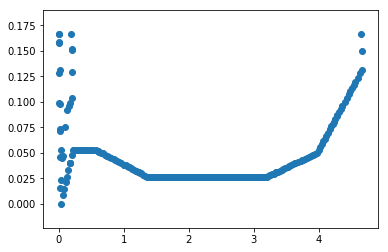

In [11]:

plt.scatter(inf_datos.loc[:,'y_coordinate'],inf_datos.loc[:,'z_coordinate'])


In [12]:
n=[]
ind=inf_datos.loc[:13,'z_coordinate'].index
ult=ind[0]
for i in ind:
    delta=(inf_datos.loc[ult,'z_coordinate']<inf_datos.loc[i,'z_coordinate'])
    if (delta):
        n.append(i)
    else:
        ult=i

ind=inf_datos.loc[13:38,'z_coordinate'].index
ult=ind[0]
for i in ind:
    delta=(inf_datos.loc[ult,'z_coordinate']>inf_datos.loc[i,'z_coordinate']) or (inf_datos.loc[i,'z_coordinate']-inf_datos.loc[ult,'z_coordinate']>0.02)
    if (delta):
        n.append(i)
    else:
        ult=i

inf_datos.drop(n,axis= 0, inplace= True)

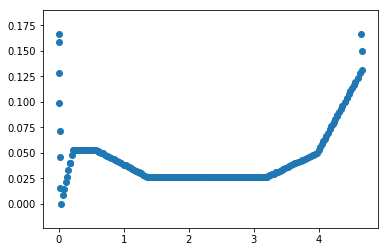

In [13]:
plt.scatter(inf_datos.loc[:,'y_coordinate'],inf_datos.loc[:,'z_coordinate'])


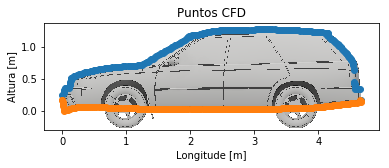

In [14]:
img_path=os.path.join(base_dir,'vistalat.PNG')
img=plt.imread(img_path)

sup=img[:][:225][:]
inf=img[:][150:][:]

fig, ax=plt.subplots()
ax.imshow(img,extent=[0,max(sup_datos.loc[:,'y_coordinate']),-0.3,-0.3+327/962*max(sup_datos.loc[:,'y_coordinate'])])
ax.scatter(sup_datos.loc[:,'y_coordinate'],sup_datos.loc[:,'z_coordinate']+max(inf_datos.loc[:,'z_coordinate']))
ax.scatter(inf_datos.loc[:,'y_coordinate'],inf_datos.loc[:,'z_coordinate'])
ax.set_ylabel('Altura [m]')
ax.set_xlabel('Longitude [m]')
ax.set_title('Puntos CFD')
plt.show()


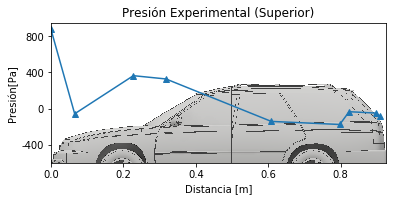

In [15]:
fig, ax=plt.subplots()
ymin=-150
ax.imshow(sup,extent=[0,925,ymin,ymin+sup.shape[0]/sup.shape[1]*925])
plt.plot(presion_exp[:-4]['y_coordinate'],presion_exp[:-4]['900 rpm']/4,'-^')
ax.set_xticklabels((ax.get_xticks()/1000).tolist())
ax.set_yticklabels([-800,-400,0,400,800])
ax.set_ylabel('Presión[Pa]')
ax.set_xlabel('Distancia [m]')
ax.set_title('Presión Experimental (Superior)')
plt.savefig('Presion Experimental(sup).jpg')
plt.show()

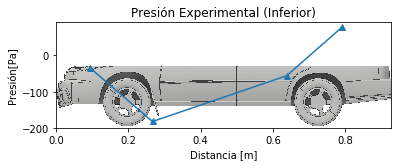

In [16]:
fig, ax=plt.subplots()
ymin=-200
ax.imshow(inf,extent=[0,925,-200,ymin+inf.shape[0]/inf.shape[1]*925])
ax.set_xticklabels((ax.get_xticks()/1000).tolist())
ax.set_ylabel('Presión[Pa]')
ax.set_xlabel('Distancia [m]')
ax.set_title('Presión Experimental (Inferior)')
plt.plot(presion_exp[-4:]['y_coordinate'],presion_exp[-4:]['900 rpm'],'-^')
plt.savefig('Presion Experimental(inf).jpg')
plt.show()


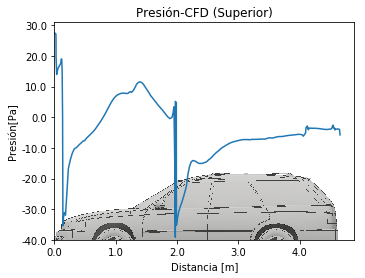

In [17]:
fig, ax=plt.subplots()
ymin=-400
ax.imshow(sup,extent=[0,925,-400,ymin+sup.shape[0]/sup.shape[1]*925])
ax.plot(sup_datos['y_coordinate']*1000/5,sup_datos['pressure']*10)
ax.set_yticklabels((ax.get_yticks()/10).tolist())
ax.set_xticklabels((5*ax.get_xticks()/1000).tolist())
ax.set_ylabel('Presión[Pa]')
ax.set_xlabel('Distancia [m]')
ax.set_title('Presión-CFD (Superior)')
plt.savefig('Presion CFD(sup).jpg')
plt.show()





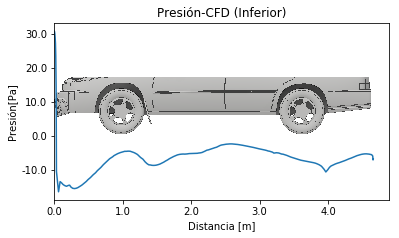

In [18]:
fig, ax=plt.subplots()
ymin=0
ax.imshow(inf,extent=[0,925,ymin,ymin+inf.shape[0]/inf.shape[1]*925])
ax.plot(inf_datos['y_coordinate']*1000/5,inf_datos['pressure']*10)
ax.set_yticklabels((ax.get_yticks()/10).tolist())
ax.set_xticklabels((5*ax.get_xticks()/1000).tolist())
ax.set_ylabel('Presión[Pa]')
ax.set_xlabel('Distancia [m]')
ax.set_title('Presión-CFD (Inferior)')
plt.savefig('Presion CFD(inf).jpg')
plt.show()



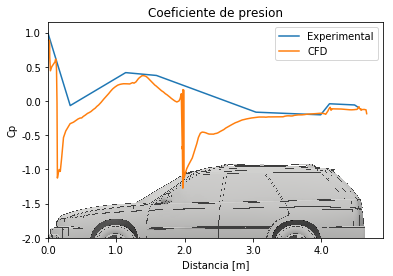

In [19]:
fig, ax=plt.subplots()

ymin=-2000
ax.imshow(sup,extent=[0,925*5,ymin,ymin+sup.shape[0]/sup.shape[1]*925*5])
ax.plot(presion_exp[:-4]['y_coordinate']*5,Cp_exp[:-4]['900 rpm']*1000)
ax.plot(sup_datos['y_coordinate']*1000,sup_datos['pressure_coefficient']*1000)
ax.set_yticklabels((ax.get_yticks()/1000).tolist())
ax.set_xticklabels((ax.get_xticks()/1000).tolist())

ax.set_ylabel('Cp')
ax.set_xlabel('Distancia [m]')
ax.set_title('Coeficiente de presion')
ax.legend(['Experimental','CFD'])


plt.savefig('Cp(sup).jpg')
plt.show()

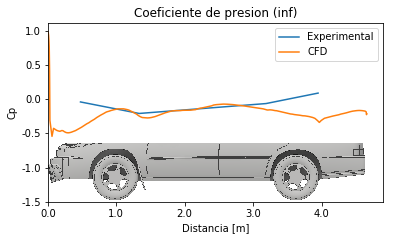

In [20]:
fig, ax=plt.subplots()
ymin=-1500
ax.imshow(inf,extent=[0,925*5,ymin,ymin+inf.shape[0]/inf.shape[1]*925*5])

ax.plot(presion_exp[-4:]['y_coordinate']*5,Cp_exp[-4:]['900 rpm']*1000)
ax.plot(inf_datos['y_coordinate']*1000,inf_datos['pressure_coefficient']*1000)
ax.set_yticklabels((ax.get_yticks()/1000).tolist())
ax.set_xticklabels((ax.get_xticks()/1000).tolist())

ax.set_ylabel('Cp')
ax.set_xlabel('Distancia [m]')
ax.set_title('Coeficiente de presion (inf)')
ax.legend(['Experimental','CFD'])


plt.savefig('Cp(inf).jpg')
plt.show()

# Grafica de diferentes velocidades

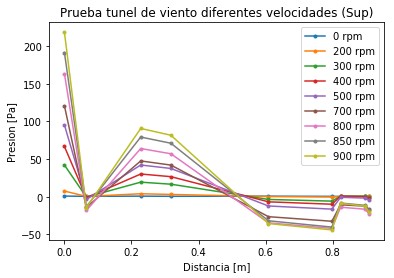

In [21]:
velocidades=Cp_exp.columns

for dato in velocidades:
    plt.plot(presion_exp[:-4]['y_coordinate']/1000,presion_exp[:-4][dato]/4,'.-')
    
    
plt.legend()
plt.xlabel('Distancia [m]')
plt.ylabel('Presion [Pa]')
plt.title('Prueba tunel de viento diferentes velocidades (Sup)')
plt.savefig('Difvel(sup).jpg')
plt.show()

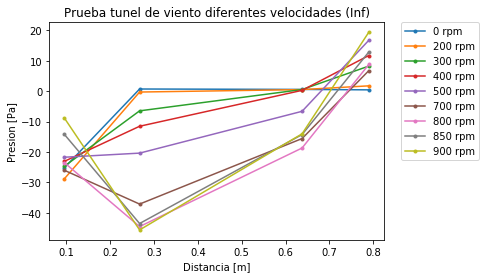

In [22]:
for dato in velocidades:
    plt.plot(presion_exp[-4:]['y_coordinate']/1000,presion_exp[-4:][dato]/4,'.-')
    
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Distancia [m]')
plt.ylabel('Presion [Pa]')
plt.title('Prueba tunel de viento diferentes velocidades (Inf)')
plt.savefig('Difvel(inf).jpg')
plt.show()

# Plotear solo los puntos 'Similares'

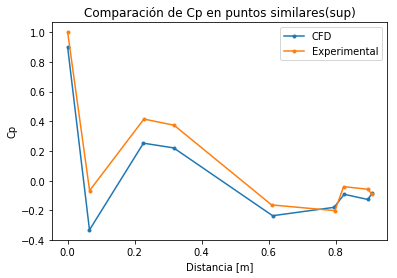

In [35]:
scor=np.array(cor[:-4])*5

ind=[]

for c in scor:
    dif=abs(sup_datos['y_coordinate']-c/1000)
    ind.append(dif.index[dif==min(dif)].tolist()[0])
ind
plt.plot(sup_datos['y_coordinate'][ind]/5,sup_datos['pressure_coefficient'][ind],'.-')
plt.plot(presion_exp[:-4]['y_coordinate']/1000,Cp_exp[:-4]['900 rpm'],'.-')
plt.legend(['CFD','Experimental'])
plt.title('Comparación de Cp en puntos similares(sup)')
plt.ylabel('Cp')
plt.xlabel('Distancia [m]')
plt.savefig('comparacionCP(sup).jpg')
plt.show()

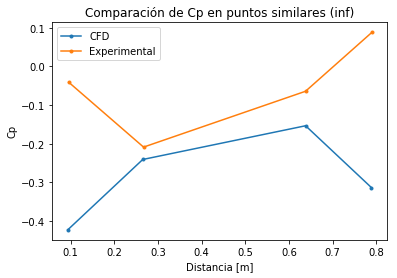

In [34]:
icor=np.array(cor[-4:])*5

ind=[]

for c in icor:
    dif=abs(inf_datos['y_coordinate']-c/1000)
    ind.append(dif.index[dif==min(dif)].tolist()[0])
ind
plt.plot(inf_datos['y_coordinate'][ind]/5,inf_datos['pressure_coefficient'][ind],'.-')
plt.plot(presion_exp[-4:]['y_coordinate']/1000,Cp_exp[-4:]['900 rpm'],'.-')
plt.legend(['CFD','Experimental'])
plt.title('Comparación de Cp en puntos similares (inf)')
plt.ylabel('Cp')
plt.xlabel('Distancia [m]')
plt.savefig('comparacionCP(inf).jpg')
plt.show()